# Objective 1
# Profile & QA the data
Your first objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

In [10]:
import pandas as pd

# Load the CSV file
file_path = "C:\\Users\\Dikshant Vats\\Downloads\\Airbnb+Data\\Airbnb Data\\Listings.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory = False)


In [11]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [13]:
df ["host_since"] = pd.to_datetime(df ["host_since"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [16]:
paris_listings = (df.query("city == 'Paris'").loc [:, ["host_since", "neighbourhood", "city", "accommodates", "price"]])
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [19]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [23]:
paris_listings.query("accommodates == 0 and price == 0 ") . count ()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

# Objective 2
# Prepare the data for visualization
Your second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [60]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [33]:
paris_listings_accommodates = (
    paris_listings
    .query ("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [34]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood":"count",
        "price" : "mean"
   })
)
paris_listings_over_time.head()

C:\Users\Dikshant Vats\AppData\Local\Temp\ipykernel_9500\1944968126.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Objective 3
# Visualize the data and summarize findings
Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

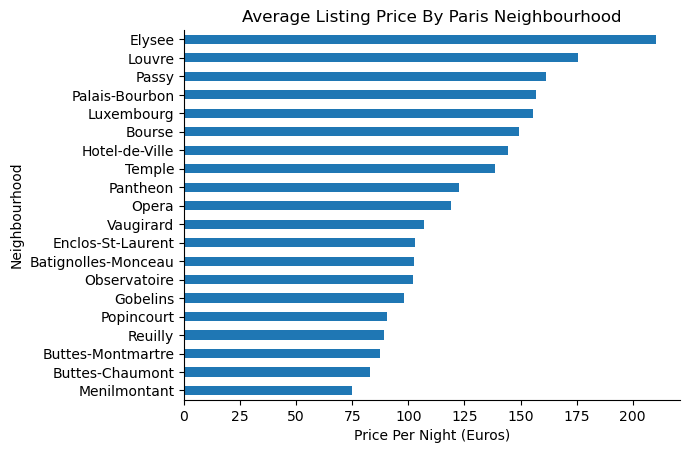

In [42]:
import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price By Paris Neighbourhood",
     xlabel="Price Per Night (Euros)",
     ylabel="Neighbourhood",
     legend=None
 )
)
sns.despine()

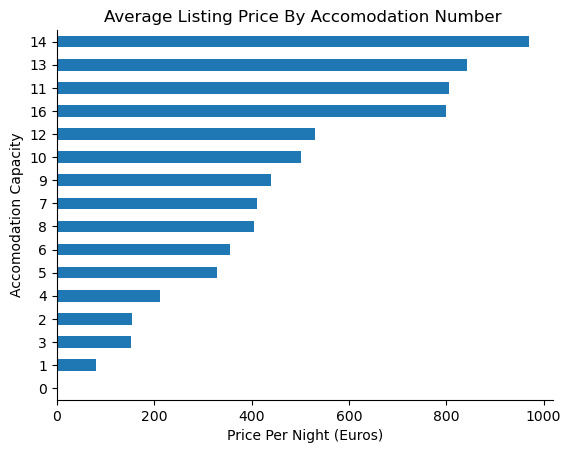

In [45]:
import seaborn as sns
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price By Accomodation Number ",
     xlabel="Price Per Night (Euros)",
     ylabel="Accomodation Capacity",
     legend=None
 )
)
sns.despine()

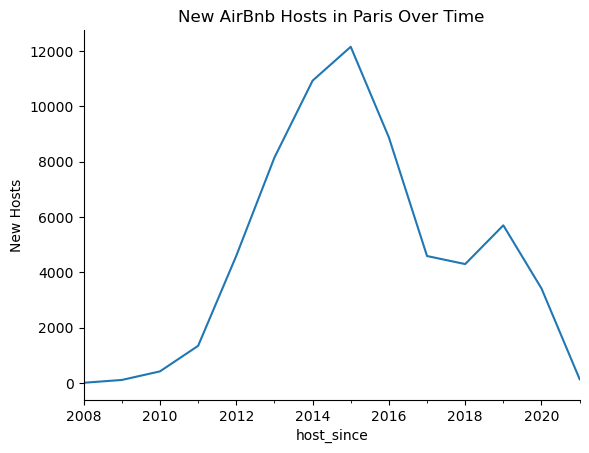

In [47]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
    
)
sns.despine()

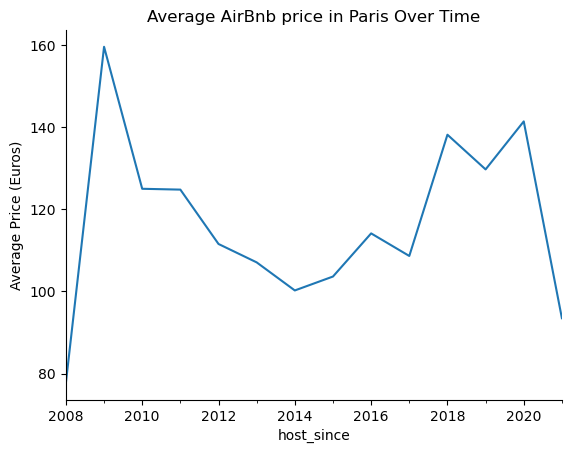

In [48]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb price in Paris Over Time"
    
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead To Fewer New Hosts, Higher Prices')

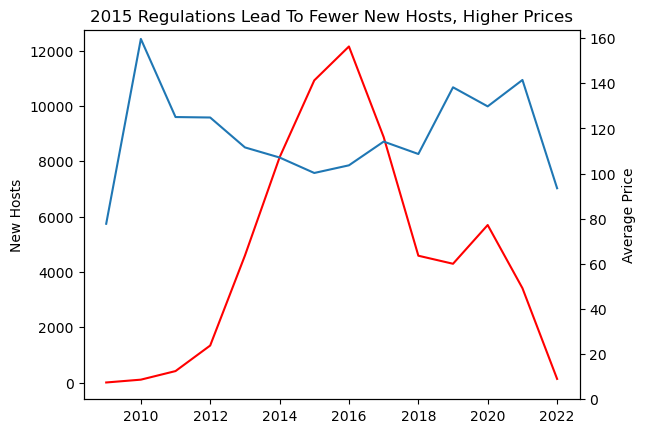

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="red"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)

ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead To Fewer New Hosts, Higher Prices")